In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv('co2rr.csv', header = None)

In [5]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop(20, axis =1).values
nms = MinMaxScaler()
X = nms.fit_transform(X)

In [6]:
y = df[20].values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32, 20), (8, 20), (32,), (8,))

In [8]:
from sklearn.ensemble import AdaBoostRegressor

adbr = AdaBoostRegressor()
adbr.fit(X_train, y_train)

AdaBoostRegressor()

In [9]:
y_train_pred = adbr.predict(X_train)
y_test_pred = adbr.predict(X_test)

In [10]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [11]:
rmse_train = np.sqrt(mse(y_train, y_train_pred))
rmse_test = np.sqrt(mse(y_test, y_test_pred))

In [12]:
rmse_train, rmse_test

(0.09730380888231932, 0.19495719048665267)

In [13]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [14]:
r2_train, r2_test

(0.9487234687676034, 0.4791152908272519)

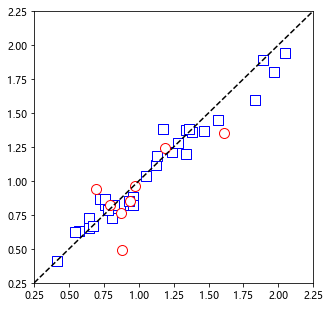

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
plt.scatter(y_train, y_train_pred, s = 100, color = 'w', edgecolor = 'b', marker = 's')
plt.scatter(y_test, y_test_pred, s = 100, color = 'w', edgecolor = 'r', marker = 'o')
plt.plot([0.25, 2.25], [0.25, 2.25], 'k--')
plt.xlim(0.25, 2.25)
plt.ylim(0.25, 2.25)
plt.show()

# 梯度提升/Gradient Boosting

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [17]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

In [18]:
rmse_train = np.sqrt(mse(y_train, y_train_pred))
rmse_test = np.sqrt(mse(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train, rmse_test, r2_train, r2_test

(0.008813767145475729,
 0.1970631468568728,
 0.9995792907102585,
 0.46780116352365364)

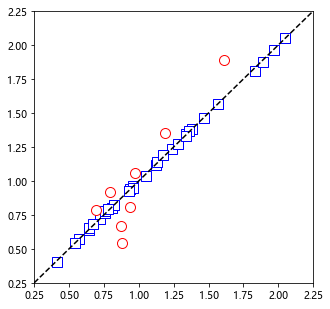

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
plt.scatter(y_train, y_train_pred, s = 100, color = 'w', edgecolor = 'b', marker = 's')
plt.scatter(y_test, y_test_pred, s = 100, color = 'w', edgecolor = 'r', marker = 'o')
plt.plot([0.25, 2.25], [0.25, 2.25], 'k--')
plt.xlim(0.25, 2.25)
plt.ylim(0.25, 2.25)
plt.show()

# 调参

In [26]:
print('n\trmse_tr\trmse_te\tr2_tr\tr2_te')

for n in range(50, 500, 50):
    adbr_gs = AdaBoostRegressor(n_estimators = n)
    adbr_gs.fit(X_train, y_train)
    y_train_pred = adbr_gs.predict(X_train)
    y_test_pred = adbr_gs.predict(X_test)
    rmse_train = np.sqrt(mse(y_train, y_train_pred))
    rmse_test = np.sqrt(mse(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'{n}\t{rmse_train:.4f}\t{rmse_test:.4f}\t{r2_train:.4f}\t{r2_test:.4f}')

n	rmse_tr	rmse_te	r2_tr	r2_te
50	0.1059	0.1995	0.9392	0.4544
100	0.1040	0.1904	0.9415	0.5032
150	0.0976	0.1750	0.9484	0.5805
200	0.1014	0.1367	0.9443	0.7439
250	0.0997	0.1689	0.9462	0.6093
300	0.1023	0.1491	0.9433	0.6952
350	0.1013	0.1826	0.9445	0.5428
400	0.1048	0.1740	0.9405	0.5850
450	0.1082	0.1762	0.9366	0.5745


In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameters = {
    'n_estimators':list(range(50, 600, 50))
}

In [29]:
gbr2 = GradientBoostingRegressor()
gs = GridSearchCV(gbr2, parameters, cv = 40, scoring='neg_mean_squared_error')

In [30]:
gs.fit(X, y)

GridSearchCV(cv=40, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550]},
             scoring='neg_mean_squared_error')

In [31]:
gs.best_params_

{'n_estimators': 300}

In [32]:
parameters = {
    'n_estimators':[250],
    'max_depth':[3],
    'min_samples_split':[3, 4, 5, 6, 7]
}

In [33]:
gbr2 = GradientBoostingRegressor()
gs = GridSearchCV(gbr2, parameters, cv = 40, scoring= 'neg_mean_squared_error')

In [34]:
gs.fit(X,y)

GridSearchCV(cv=40, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [3], 'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [250]},
             scoring='neg_mean_squared_error')

In [35]:
gs.best_params_

{'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 250}

In [38]:
gbr3 = gs.best_estimator_

In [39]:
gbr3.fit(X_train, y_train)

GradientBoostingRegressor(min_samples_split=6, n_estimators=250)

In [40]:
params = {
    'n_estimators':500,
    'max_depth': 5,
    'min_samples_split':5,
    'learning_rate':0.005,
    'loss':'huber'
}

In [41]:
gbr4 = GradientBoostingRegressor(**params)

In [42]:
gbr4.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.005, loss='huber', max_depth=5,
                          min_samples_split=5, n_estimators=500)

In [44]:
y_train_pred = gbr4.predict(X_train)
y_test_pred = gbr4.predict(X_test)

In [45]:
rmse_train = np.sqrt(mse(y_train, y_train_pred))
rmse_test = np.sqrt(mse(y_test, y_test_pred))

In [46]:
rmse_train, rmse_test

(0.08500001683028129, 0.11801664027008989)

In [47]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [48]:
r2_train, r2_test

(0.9608711593637776, 0.8091247639484054)

In [49]:
from sklearn.model_selection import cross_val_score

In [56]:
scores_rmse = cross_val_score(gbr4, X, y, scoring = 'neg_root_mean_squared_error', cv = len(X))
print('Cross-validation results:')
print('Folds: %i, mean RMSE: %.3f' % (len(scores_rmse), -scores_rmse.mean()))

Cross-validation results:
Folds: 40, mean RMSE: 0.329


(0.25, 2.25)

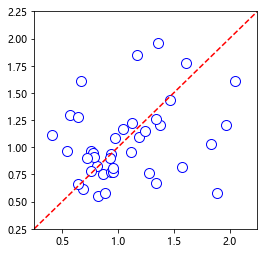

In [57]:
from sklearn.model_selection import cross_val_predict
y_cv =cross_val_predict(gbr4, X, y, cv = 40)

plt.figure(figsize = (4, 4))
plt.scatter(y, y_cv, s = 100, color ='w', edgecolor ='b' )
plt.plot([0.25, 2.25], [0.25, 2.25], 'r--')
plt.xlim(0.25, 2.25)
plt.ylim(0.25, 2.25)